In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the Dataset

In [92]:
ds=pd.read_csv('insurance.csv')

## Checking first 5 rows of all columns

In [93]:
ds.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Checking Shape of Dataset

In [94]:
print('No.of Rows:',ds.shape[0])
print('No.of Columns:',ds.shape[1])

No.of Rows: 1338
No.of Columns: 7


## Information of Data

In [95]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### We can see there is no missing values as per above information

In [96]:
ds.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Statistical parameters of Numerical Columns

In [97]:
ds.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Checking Oulier in Numerical COlumns

In [98]:
ds_num=ds[['age','bmi','children','charges']]

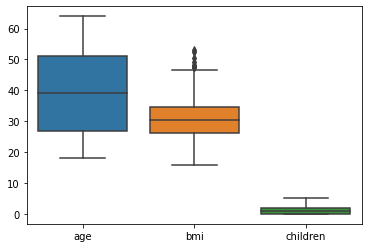

In [99]:
sns.boxplot(data=ds_num.iloc[:,:-1])

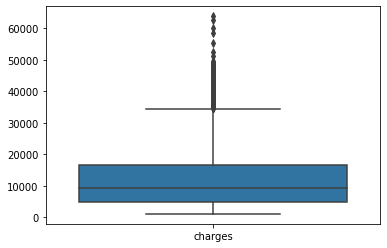

In [100]:
sns.boxplot(data=ds_num.iloc[:,3:4])

### as we can see Charges & bmi show some points above whiskers but we will ignore that till time

### Checking unique values/categories in Categorical Columns

In [101]:
ds_cat=ds[['sex','smoker','region']]
ds_cat.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [102]:
ds_cat.sex.unique()

array(['female', 'male'], dtype=object)

In [103]:
ds_cat.smoker.unique()

array(['yes', 'no'], dtype=object)

In [104]:
ds_cat.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

### creating dummy variable on Categorical column for further process

In [105]:
ds_dummies=pd.get_dummies(ds_cat,drop_first=True)

In [106]:
ds_dummies

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,1,0,0
4,1,0,1,0,0
...,...,...,...,...,...
1333,1,0,1,0,0
1334,0,0,0,0,0
1335,0,0,0,1,0
1336,0,0,0,0,1


## Joining Dummies Dataframe & Numerical datframe for train_test Split

In [107]:
ds_new=pd.concat([ds_num,ds_dummies],axis=1)

In [108]:
ds_new.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [109]:
ds_new.shape

(1338, 9)

In [110]:
ds_new.describe()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.204783,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000


In [111]:
y=ds_new.pop('charges')
X=ds_new

## train_ test_split

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=100)

In [114]:
X_train.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
966,51,24.795,2,1,1,1,0,0
522,51,33.915,0,0,0,0,0,0
155,44,39.520,0,1,0,1,0,0
671,29,31.160,0,0,0,0,0,0
1173,38,29.260,2,1,0,1,0,0


In [115]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [116]:
X_train_scaled=scaler.fit_transform(X_train)

In [117]:
X_train_scaled

array([[ 0.84739927, -0.96630151,  0.74447025, ...,  1.75708174,
        -0.62678317, -0.565835  ],
       [ 0.84739927,  0.50269258, -0.91463487, ..., -0.56912549,
        -0.62678317, -0.565835  ],
       [ 0.34993847,  1.40551187, -0.91463487, ...,  1.75708174,
        -0.62678317, -0.565835  ],
       ...,
       [ 1.27379425, -1.22643588, -0.91463487, ...,  1.75708174,
        -0.62678317, -0.565835  ],
       [ 0.13674098,  0.34967237, -0.91463487, ...,  1.75708174,
        -0.62678317, -0.565835  ],
       [-1.21350977, -1.22643588, -0.91463487, ..., -0.56912549,
        -0.62678317, -0.565835  ]])

In [118]:
from sklearn.linear_model import LinearRegression
Lr=LinearRegression()

In [119]:
model=Lr.fit(X_train_scaled,y_train)

In [120]:
y_train_pred=Lr.predict(X_train_scaled)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


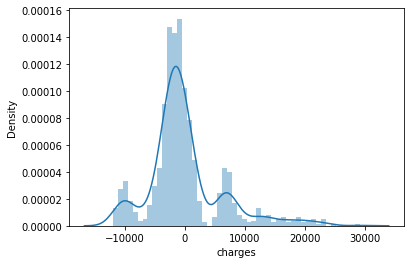

In [121]:
sns.distplot(y_train-y_train_pred)
plt.show()

In [122]:
from sklearn.metrics import r2_score

### R2_score on train data

In [123]:
r2_score(y_train,y_train_pred)

0.7378638257001522

In [124]:
X_test_scaled=scaler.transform(X_test)

In [125]:
X_test_scaled

array([[-1.14244394,  0.58081343, -0.91463487, ..., -0.56912549,
        -0.62678317,  1.76729964],
       [-0.7871148 , -0.53059657,  0.74447025, ..., -0.56912549,
        -0.62678317,  1.76729964],
       [ 0.34993847, -0.50724086, -0.91463487, ...,  1.75708174,
        -0.62678317, -0.565835  ],
       ...,
       [-1.07137811, -0.09408627,  1.5740228 , ...,  1.75708174,
        -0.62678317, -0.565835  ],
       [-0.36071982,  0.80873302, -0.91463487, ...,  1.75708174,
        -0.62678317, -0.565835  ],
       [ 0.13674098, -0.4001267 , -0.08508231, ...,  1.75708174,
        -0.62678317, -0.565835  ]])

In [126]:
y_test_pred=model.predict(X_test_scaled)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


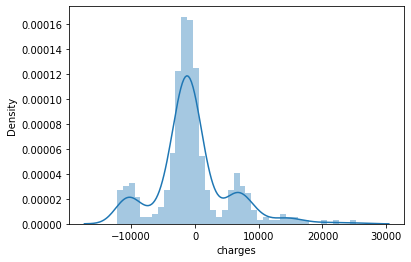

In [127]:
sns.distplot(y_test-y_test_pred)

### R2_score on test data

In [128]:
a=r2_score(y_test,y_test_pred)

## Checking with Lasso

In [129]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)

In [130]:
model1=clf.fit(X_train_scaled,y_train)

In [131]:
y_test_pred=model1.predict(X_test_scaled)

In [132]:
b=r2_score(y_test,y_test_pred)

## Checking with Ridge

In [133]:
from sklearn.linear_model import Ridge

r= linear_model.Ridge(alpha=0.1)

In [134]:
model2=r.fit(X_train_scaled,y_train)

In [135]:
y_test_pred=model2.predict(X_test_scaled)

In [136]:
c=r2_score(y_test,y_test_pred)

### Summary

In [137]:
print('r2_score with Linear Regression:',a)
print('r2_score with Lasso:',b)
print('r2_score with Ridge:',c)

r2_score with Linear Regression: 0.7772310511733103
r2_score with Lasso: 0.7772322324027039
r2_score with Ridge: 0.7772337277899708


## Conclusion:
  - As all Linear regression model gives same prediction but Ridge is best one so we can choose Ridge Regression

In [147]:
y_test[12]

1826.8429999999998

In [148]:
y_test_pred[12]

11834.092849910638

In [150]:
(y_test-y_test_pred)

12      -2259.311972
306     15845.505965
318     -1014.255861
815     -1237.025486
157    -10184.769363
            ...     
710     -2423.251151
1005    -2230.275827
389      -777.620421
923     -3881.715136
1164    -1166.931034
Name: charges, Length: 402, dtype: float64